# UEFA Champions League 22/23 Final Prediction
#### Manchester City vs Inter Milan | Analyzed and presented by Nilkanth Suthar 

## Extracting and cleaning the Data

In [117]:
import pandas as pd
import numpy as np

#importing the datset

dtype_mapping = {32: str, 38: str, 39: str, 40: str, 41: str, 49: str, 53: str}
teams = pd.read_csv('Data\male_teams.csv', dtype=dtype_mapping)
matches = pd.read_csv('Data\matches_champions_league_2022-23.csv')


In [118]:
teams.head(10)

,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,rival_team,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age,captain,short_free_kick,long_free_kick,left_short_free_kick,right_short_free_kick,penalties,left_corner,right_corner,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,def_defence_defender_line,off_style,off_build_up_play,off_chance_creation,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,455361.0,Etihad Stadium,11,10,10.0,NaN,-2.147484e+09,27.09,25.88,186942.0,192985.0,192985.0,192985.0,192985.0,192985.0,192985.0,237692.0,Press After Possession Loss,71.0,81.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,71.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,/team/73/paris-saint-germain/230009,23,9,2023-01-13,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,524011.0,Parc des Princes,219,9,10.0,NaN,-2.147484e+09,26.82,26.04,207865.0,190871.0,158023.0,190871.0,158023.0,190871.0,190871.0,190871.0,Press After Possession Loss,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,41.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,/team/243/real-madrid/230009,23,9,2023-01-13,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,455800.0,Estadio Santiago Bernabéu,241,10,10.0,NaN,-2.147484e+09,28.55,24.64,165153.0,182521.0,182521.0,182521.0,197445.0,165153.0,182521.0,182521.0,Balanced,51.0,71.0,NaN,NaN,NaN,NaN,NaN,Balanced,Balanced,51.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1337,/team/1337/germany/230009,23,9,2023-01-13,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,37352367.0,Stadion Olympik,1318,10,NaN,NaN,NaN,28.27,27.22,167495.0,186942.0,212622.0,186942.0,186942.0,186942.0,212622.0,212622.0,Pressure On Heavy Touch,61.0,61.0,NaN,NaN,NaN,NaN,NaN,Fast Build Up,Forward Runs,61.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,/team/5/chelsea/230009,23,9,2023-01-13,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,452683.0,Stamford Bridge,1,8,9.0,NaN,-2.147484e+09,26.73,24.55,205498.0,233064.0,233064.0,233064.0,233064.0,205498.0,233064.0,233064.0,Balanced,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,61.0,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,/team/9/liverpool/230009,23,9,2023-01-13,Liverpool,13,Premier League,1.0,14,England,84,84,82,86,455353.0,Anfield,11,9,9.0,NaN,-2.147484e+09,26.73,25.03,203376.0,231281.0,231281.0,231281.0,231281.0,209331.0,216267.0,231281.0,Press After Possession Loss,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Balanced,Balanced,71.0,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21,/team/21/fc-bayern-munchen/230009,23,9,2023-01-13,FC Bayern München,19,Bundesliga,1.0,21,Germany,84,78,86,83,458813.0,Sanderson Park (FIFA 13 NEW generic),22,10,10.0,NaN,-2.147484e+09,26.09,25.04,212622.0,212622.0,212622.0,208722.0,212622.0,208722.0,212622.0,212622.0,Pressure On Heavy Touch,41.0,81.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,81.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,241,/team/241/fc-barcelona/230009,23,9,2023-01-13,FC Barcelona,53,La Liga,1.0,45,Spain,84,84,85,82,184942.0,El Libertador (La Bombastico),243,10,10.0,NaN,-2.147484e+09,26.36,23.55,189511.0,188545.0,251854.0,188545.0,188545.0,188545.0,231443.0,231443.0,Balanced,61.0,81.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,51.0,7.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1318,/team/1318/england/230009,23,9,2023-01-13,England,78,Friendly International,NaN,14,England,84,85,83,83,474589.0,Wembley Stadium,1337,8,NaN,NaN,NaN,26.55,25.91,202

In [119]:
teams = teams.iloc[[0, 9]]
teams = teams.dropna(axis=1).reset_index(drop=True)

In [120]:
pd.set_option('display.max_columns', None)
teams.head()

,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,rival_team,international_prestige,domestic_prestige,club_worth_eur,starting_xi_average_age,whole_team_average_age,captain,short_free_kick,long_free_kick,left_short_free_kick,right_short_free_kick,penalties,left_corner,right_corner,def_style,def_team_width,def_team_depth,off_build_up_play,off_chance_creation,off_team_width,off_players_in_box,off_corners,off_free_kicks
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,455361.0,Etihad Stadium,11,10,10.0,-2.147484e+09,27.09,25.88,186942.0,192985.0,192985.0,192985.0,192985.0,192985.0,192985.0,237692.0,Press After Possession Loss,71.0,81.0,Slow Build Up,Possession,71.0,6.0,3.0,3.0
1,44,/team/44/inter/230009,23,9,2023-01-13,Inter,31,Serie A,1.0,27,Italy,83,85,83,83,128160.0,San Siro,47,7,9.0,9.490000e+08,27.45,27.25,232363.0,208128.0,208128.0,208128.0,208128.0,231478.0,208128.0,208128.0,Balanced,51.0,61.0,Fast Build Up,Forward Runs,51.0,4.0,3.0,3.0


In [121]:
extract = ['team_name', 'overall', 'attack', 'midfield', 'defence', 'starting_xi_average_age', 'whole_team_average_age',
       'def_team_width', 'def_team_depth', 'off_team_width', 'off_players_in_box',
       'off_corners', 'off_free_kicks']

teams = teams[extract]
teams.head()

,team_name,overall,attack,midfield,defence,starting_xi_average_age,whole_team_average_age,def_team_width,def_team_depth,off_team_width,off_players_in_box,off_corners,off_free_kicks
0,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0
1,Inter,83,85,83,83,27.45,27.25,51.0,61.0,51.0,4.0,3.0,3.0


In [122]:
matches.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Semi-finals second leg,17/05/2023,False,False,False,Manchester City,Real Madrid,4,0,0.60,0.40,16,7,8,3,0.58,0.42,0.48,0.02,0.50,843429,Etihad Stadium,"[{'player_name': ' Haaland', 'player_number': ...","[{'player_name': ' Vinícius Júnior', 'player_n...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['9', '10', '8', '17', '20', '16', '5', '25', ...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['20', '9', '21', '10', '8', '15', '12', '4', ..."
1,2,Semi-finals second leg,16/05/2023,False,False,False,Inter,Milan,1,0,0.43,0.57,15,5,4,1,0.52,0.48,0.44,0.04,0.52,395373,Giuseppe Meazza,"[{'player_name': ' Dzeko', 'player_number': '9...","[{'player_name': ' Giroud', 'player_number': '...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['9', '10', '32', '22', '20', '23', '2', '95',...","['Giroud', 'Leão', 'Diaz', 'Messias', 'Tonali'...","['9', '17', '10', '30', '8', '33', '19', '23',..."
2,3,Semi-finals first leg,10/05/2023,False,False,False,Milan,Inter,0,2,0.58,0.42,13,16,2,5,0.51,0.49,0.60,0.05,0.35,446409,Giuseppe Meazza,"[{'player_name': ' Giroud', 'player_number': '...","[{'player_name': ' Dzeko', 'player_number': '9...","['Giroud', 'Saelemaekers', 'Bennacer', 'Diaz',...","['9', '56', '4', '10', '8', '33', '19', '23', ...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['9', '10', '32', '22', '20', '23', '2', '95',..."
3,4,Semi-finals first leg,09/05/2023,False,False,False,Real Madrid,Manchester City,1,1,0.44,0.56,13,10,4,6,0.46,0.54,0.52,0.04,0.44,889168,Santiago Bernabéu,"[{'player_name': ' Vinícius Júnior', 'player_n...","[{'player_name': ' Haaland', 'player_number': ...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['20', '9', '21', '10', '8', '15', '12', '4', ...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['9', '10', '8', '17', '20', '16', '5', '25', ..."
4,5,Quarter-finals second leg,19/04/2023,False,False,False,Inter,Benfica,3,3,0.40,0.60,11,12,3,5,0.54,0.46,0.68,0.04,0.28,265718,Giuseppe Meazza,"[{'player_name': ' Dzeko', 'player_number': '9...","[{'player_name': ' Ramos', 'player_number': '8...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['9', '10', '32', '22', '77', '23', '2', '95',...","['Ramos', 'Aursnes', 'Silva', 'João Mário', 'C...","['88', '8', '27', '20', '22', '61', '3', '30',..."


In [123]:
#Extracting matches for Manchester City
rows = matches[matches['team_name_home'].str.contains('Manchester City') | matches['team_name_away'].str.contains('Manchester City')]
city_match = pd.DataFrame(rows).reset_index(drop=True)
drop = ['match_id', 'pens', 'pens_home_score', 'prediction_team_away_win', 'lineup_home', 'prediction_quantity', 'lineup_away', 'prediction_draw', 'prediction_team_home_win','pens_away_score', 'location', 'player_numbers_home', 'player_numbers_away']
city_match = city_match.drop(columns=drop)
city_match.head()

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,player_names_home,player_names_away
0,Semi-finals second leg,17/05/2023,Manchester City,Real Madrid,4,0,0.60,0.40,16,7,8,3,0.58,0.42,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod..."
1,Semi-finals first leg,09/05/2023,Real Madrid,Manchester City,1,1,0.44,0.56,13,10,4,6,0.46,0.54,"['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne..."
2,Quarter-finals second leg,19/04/2023,Bayern Munich,Manchester City,1,1,0.58,0.42,19,7,7,2,0.47,0.53,"['Choupo-Moting', 'Sané', 'Musiala', 'Coman', ...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne..."
3,Quarter-finals first leg,11/04/2023,Manchester City,Bayern Munich,3,0,0.44,0.56,17,12,9,4,0.55,0.45,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Gnabry', 'Sané', 'Musiala', 'Coman', 'Goretz..."
4,Round of 16 second leg,14/03/2023,Manchester City,RB Leipzig,7,0,0.67,0.33,23,4,16,1,0.59,0.41,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Werner', 'Szoboszlai', 'Forsberg', 'Laimer',..."


In [124]:
#Extracting matches for Inter
rows = matches[matches['team_name_home'].str.contains('Inter') | matches['team_name_away'].str.contains('Inter')]
inter_match = pd.DataFrame(rows).reset_index(drop=True)
inter_match = inter_match.drop(columns=drop)
inter_match.head()

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,player_names_home,player_names_away
0,Semi-finals second leg,16/05/2023,Inter,Milan,1,0,0.43,0.57,15,5,4,1,0.52,0.48,"['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['Giroud', 'Leão', 'Diaz', 'Messias', 'Tonali'..."
1,Semi-finals first leg,10/05/2023,Milan,Inter,0,2,0.58,0.42,13,16,2,5,0.51,0.49,"['Giroud', 'Saelemaekers', 'Bennacer', 'Diaz',...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',..."
2,Quarter-finals second leg,19/04/2023,Inter,Benfica,3,3,0.40,0.60,11,12,3,5,0.54,0.46,"['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['Ramos', 'Aursnes', 'Silva', 'João Mário', 'C..."
3,Quarter-finals first leg,11/04/2023,Benfica,Inter,0,2,0.58,0.42,12,9,2,4,0.40,0.60,"['Ramos', 'Aursnes', 'Silva', 'João Mário', 'C...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',..."
4,Round of 16 second leg,14/03/2023,FC Porto,Inter,0,0,0.68,0.32,21,11,7,5,0.52,0.48,"['Taremi', 'Galeno', 'Eustáquio', 'de Lima Bar...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',..."


In [125]:
#Combined match data
matches = pd.concat([city_match, inter_match], ignore_index=True)
matches['team_name'] = matches.apply(lambda row: 'Inter' if row['team_name_home'] == 'Inter' or row['team_name_away'] == 'Inter' else 'Manchester City', axis=1)
matches['winner'] = matches.apply(lambda row: row['team_name_home'] if row['team_home_score'] > row['team_away_score'] else row['team_name_away'], axis=1)
matches['winner01'] = matches['winner'].apply(lambda x: 1 if x in ['Manchester City', 'Inter'] else 0)
matches['home_or_away'] = matches.apply(lambda row: 'Home' if row['team_name_home'] in ['Manchester City', 'Inter'] else 'Away', axis=1)
matches['goals_scored'] = matches.apply(lambda row: row['team_home_score'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['team_away_score'], axis=1)
matches['final_score'] = matches.apply(lambda row: f"{row['team_home_score']}-{row['team_away_score']}" if row['home_or_away'] == 'Home' else f"{row['team_away_score']}-{row['team_home_score']}", axis=1)
matches['possession'] = matches.apply(lambda row: row['possession_home'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['possession_away'], axis=1)
matches['total_shots'] = matches.apply(lambda row: row['total_shots_home'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['total_shots_away'], axis=1)
matches['duels_won'] = matches.apply(lambda row: row['duels_won_home'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['duels_won_away'], axis=1)
matches['goals_conceded'] =  matches.apply(lambda row: row['team_away_score'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['team_away_score'], axis=1)
matches['shots_on_target'] = matches.apply(lambda row: row['shots_on_target_home'] if row['team_name_home'] in ['Manchester City', 'Inter'] else row['shots_on_target_away'], axis=1)
matches['team_opp'] = matches.apply(lambda row: row['team_name_away'] if row['team_name_home'] == 'Inter' or row['team_name_home'] == 'Manchester City' else row['team_name_home'], axis=1)
matches.head()

,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,player_names_home,player_names_away,team_name,winner,winner01,home_or_away,goals_scored,final_score,possession,total_shots,duels_won,goals_conceded,shots_on_target,team_opp
0,Semi-finals second leg,17/05/2023,Manchester City,Real Madrid,4,0,0.60,0.40,16,7,8,3,0.58,0.42,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...",Manchester City,Manchester City,1,Home,4,4-0,0.60,16,0.58,0,8,Real Madrid
1,Semi-finals first leg,09/05/2023,Real Madrid,Manchester City,1,1,0.44,0.56,13,10,4,6,0.46,0.54,"['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...",Manchester City,Manchester City,1,Away,1,1-1,0.56,10,0.54,1,6,Real Madrid
2,Quarter-finals second leg,19/04/2023,Bayern Munich,Manchester City,1,1,0.58,0.42,19,7,7,2,0.47,0.53,"['Choupo-Moting', 'Sané', 'Musiala', 'Coman', ...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...",Manchester City,Manchester City,1,Away,1,1-1,0.42,7,0.53,1,2,Bayern Munich
3,Quarter-finals first leg,11/04/2023,Manchester City,Bayern Munich,3,0,0.44,0.56,17,12,9,4,0.55,0.45,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Gnabry', 'Sané', 'Musiala', 'Coman', 'Goretz...",Manchester City,Manchester City,1,Home,3,3-0,0.44,17,0.55,0,9,Bayern Munich
4,Round of 16 second leg,14/03/2023,Manchester City,RB Leipzig,7,0,0.67,0.33,23,4,16,1,0.59,0.41,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Werner', 'Szoboszlai', 'Forsberg', 'Laimer',...",Manchester City,Manchester City,1,Home,7,7-0,0.67,23,0.59,0,16,RB Leipzig


In [126]:
merged_df = pd.merge(teams, matches, left_on='team_name', right_on='team_name', how='inner')
merged_df.head()

,team_name,overall,attack,midfield,defence,starting_xi_average_age,whole_team_average_age,def_team_width,def_team_depth,off_team_width,off_players_in_box,off_corners,off_free_kicks,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,player_names_home,player_names_away,winner,winner01,home_or_away,goals_scored,final_score,possession,total_shots,duels_won,goals_conceded,shots_on_target,team_opp
0,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0,Semi-finals second leg,17/05/2023,Manchester City,Real Madrid,4,0,0.60,0.40,16,7,8,3,0.58,0.42,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...",Manchester City,1,Home,4,4-0,0.60,16,0.58,0,8,Real Madrid
1,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0,Semi-finals first leg,09/05/2023,Real Madrid,Manchester City,1,1,0.44,0.56,13,10,4,6,0.46,0.54,"['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...",Manchester City,1,Away,1,1-1,0.56,10,0.54,1,6,Real Madrid
2,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0,Quarter-finals second leg,19/04/2023,Bayern Munich,Manchester City,1,1,0.58,0.42,19,7,7,2,0.47,0.53,"['Choupo-Moting', 'Sané', 'Musiala', 'Coman', ...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...",Manchester City,1,Away,1,1-1,0.42,7,0.53,1,2,Bayern Munich
3,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0,Quarter-finals first leg,11/04/2023,Manchester City,Bayern Munich,3,0,0.44,0.56,17,12,9,4,0.55,0.45,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Gnabry', 'Sané', 'Musiala', 'Coman', 'Goretz...",Manchester City,1,Home,3,3-0,0.44,17,0.55,0,9,Bayern Munich
4,Manchester City,85,85,86,86,27.09,25.88,71.0,81.0,71.0,6.0,3.0,3.0,Round of 16 second leg,14/03/2023,Manchester City,RB Leipzig,7,0,0.67,0.33,23,4,16,1,0.59,0.41,"['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['Werner', 'Szoboszlai', 'Forsberg', 'Laimer',...",Manchester City,1,Home,7,7-0,0.67,23,0.59,0,16,RB Leipzig


In [127]:
extract= ['team_name', 'overall', 'attack', 'midfield', 'defence',
       'starting_xi_average_age', 'whole_team_average_age', 'def_team_width',
       'def_team_depth', 'off_team_width', 'off_players_in_box', 'off_corners',
       'off_free_kicks', 'stage', 'date', 'team_name_home', 'team_name_away',
        'winner', 'home_or_away', 'goals_scored', 'possession',
       'total_shots', 'duels_won', 'goals_conceded', 'shots_on_target',
       'team_opp']
visual_data= merged_df[extract] 
visual_data.columns

Index(['team_name', 'overall', 'attack', 'midfield', 'defence',
       'starting_xi_average_age', 'whole_team_average_age', 'def_team_width',
       'def_team_depth', 'off_team_width', 'off_players_in_box', 'off_corners',
       'off_free_kicks', 'stage', 'date', 'team_name_home', 'team_name_away',
       'winner', 'home_or_away', 'goals_scored', 'possession', 'total_shots',
       'duels_won', 'goals_conceded', 'shots_on_target', 'team_opp'],
      dtype='object')

In [128]:
#Exporting our datasets for future reference
teams.to_csv('Data/teams.csv', index=False)
city_match.to_csv('Data/city_matches.csv', index=False)
inter_match.to_csv('Data/inter_matches.csv', index=False)
matches.to_csv('Data/matches.csv', index=False)

## EDA and Prediction

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

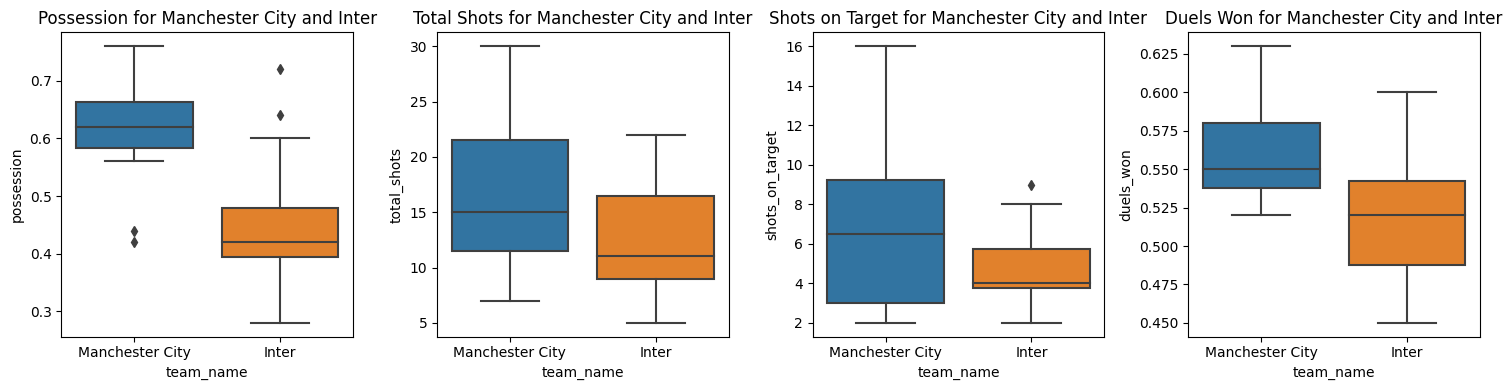

In [130]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.boxplot(x='team_name', y='possession', data=matches)
plt.title('Possession for Manchester City and Inter')

plt.subplot(1, 4, 2)
sns.boxplot(x='team_name', y='total_shots', data=matches)
plt.title('Total Shots for Manchester City and Inter')

plt.subplot(1, 4, 3)
sns.boxplot(x='team_name', y='shots_on_target', data=matches)
plt.title('Shots on Target for Manchester City and Inter')

plt.subplot(1, 4, 4)
sns.boxplot(x='team_name', y='duels_won', data=matches)
plt.title('Duels Won for Manchester City and Inter')

plt.tight_layout()
plt.show()


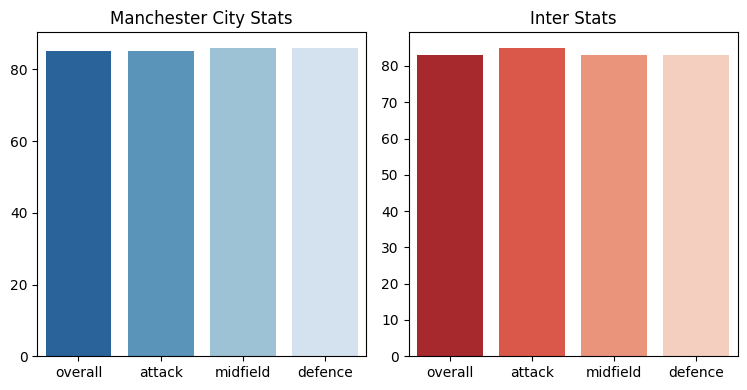

In [131]:
city_stats = teams.loc[teams['team_name'] == 'Manchester City', ['overall', 'attack', 'midfield', 'defence']]
inter_stats = teams.loc[teams['team_name'] == 'Inter', ['overall', 'attack', 'midfield', 'defence']]

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=city_stats.columns, y=city_stats.values.flatten(), palette='Blues_r')
plt.title('Manchester City Stats')

plt.subplot(1, 4, 2)
sns.barplot(x=inter_stats.columns, y=inter_stats.values.flatten(), palette='Reds_r')
plt.title('Inter Stats')

plt.tight_layout()
plt.show()


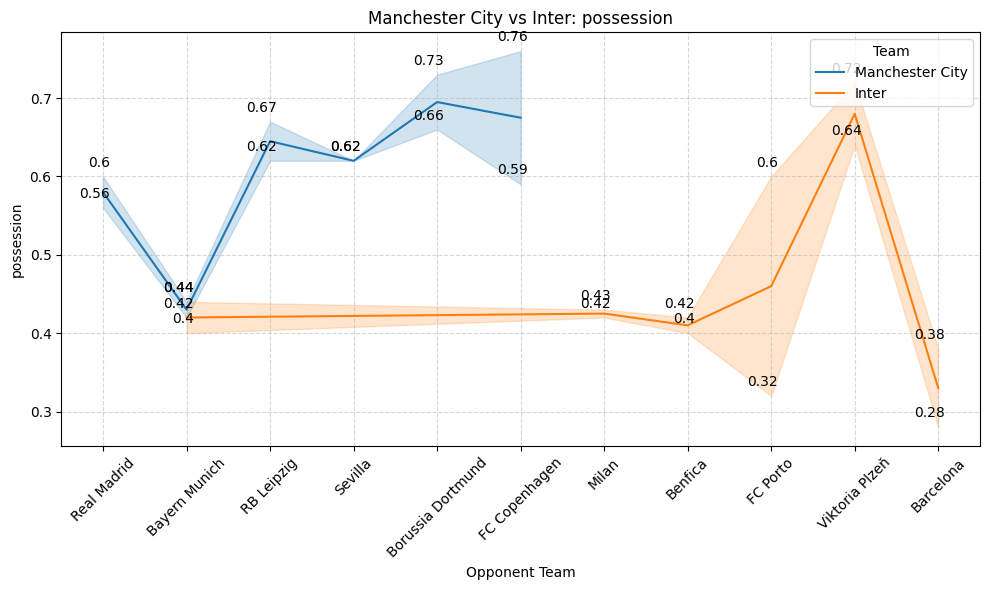

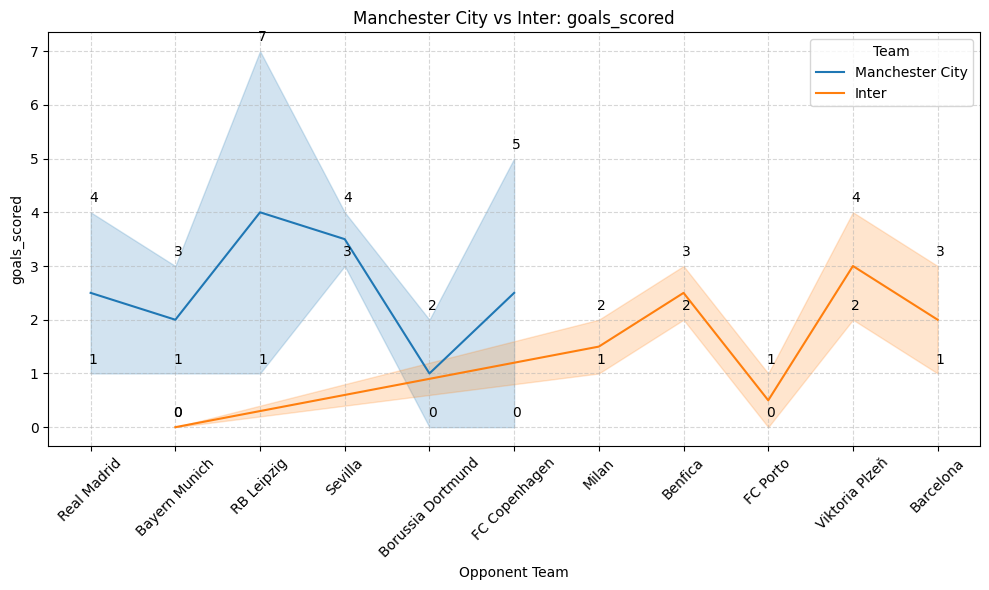

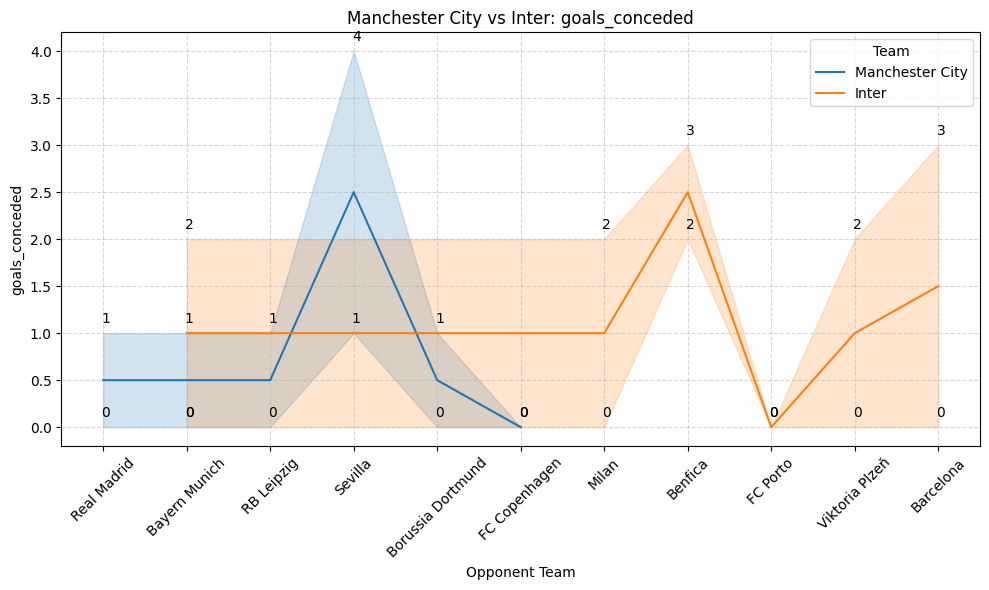

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['possession', 'goals_scored', 'goals_conceded']

team1 = 'Manchester City'
team2 = 'Inter'
team1_df = merged_df[(merged_df['team_name'] == team1)]
team2_df = merged_df[(merged_df['team_name'] == team2)]

combined_df = pd.concat([team1_df, team2_df])

for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='team_opp', y=column, data=combined_df, hue='team_name')

    for _, row in combined_df.iterrows():
        plt.annotate(f"{row[column]}", xy=(row['team_opp'], row[column]), xytext=(5, 5),
                     textcoords='offset points', ha='right', va='bottom')

    plt.title(f"{team1} vs {team2}: {column}")
    plt.xlabel('Opponent Team')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    plt.legend(title='Team')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


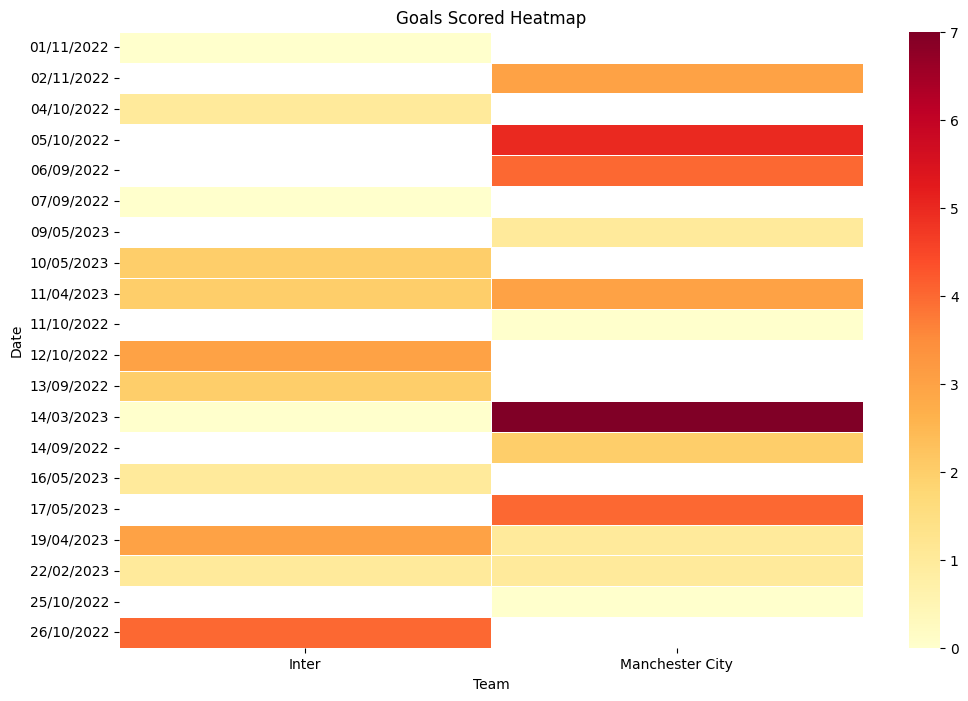

In [133]:
# Create a pivot table of goals scored by team and date
goals_pivot = merged_df.pivot_table(index='date', columns='team_name', values='goals_scored')

# Plot a heatmap of goals scored
plt.figure(figsize=(12, 8))
sns.heatmap(goals_pivot, cmap='YlOrRd', linecolor='white', linewidths=0.5)
plt.title('Goals Scored Heatmap')
plt.xlabel('Team')
plt.ylabel('Date')
plt.show()

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



# Select relevant features for prediction
selected_features = ['overall', 'attack', 'midfield', 'defence',
                     'starting_xi_average_age', 'whole_team_average_age',
                     'def_team_width', 'def_team_depth', 'off_team_width',
                     'off_players_in_box', 'off_corners', 'off_free_kicks']

# Extract the features and target variable
X = merged_df[selected_features]
y = merged_df['winner01']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(selected_features),)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

# Prepare the features for Manchester City and Inter
team1_features = pd.DataFrame([[83, 85, 83, 83, 27.45, 27.25, 51.0, 61.0, 51.0, 4.0, 3.0, 3.0]])
team2_features = pd.DataFrame([[85, 85, 86, 86, 27.09, 25.88, 71.0, 81.0, 71.0, 6.0, 3.0, 3.0]])

# Normalize the team features
team1_features = scaler.transform(team1_features)
team2_features = scaler.transform(team2_features)

# Make predictions using the trained model
team1_prediction = model.predict(team1_features)
team2_prediction = model.predict(team2_features)

# Convert the predicted labels back to team names
team1 = 'Inter' if team1_prediction[0][0] < 0.5 else 'Manchester City'
team2 = 'Inter' if team2_prediction[0][0] < 0.5 else 'Manchester City'

# Print the predicted winners
print("Predicted winner between Inter and Manchester City:", team1)
print("Predicted winner between Manchester City and Inter:", team2)


Epoch 1/50
1/1 [==============================] - 1s 586ms/step - loss: 0.6728 - accuracy: 0.5263 - val_loss: 0.7944 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.7303 - accuracy: 0.4211 - val_loss: 0.7674 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.7197 - accuracy: 0.4737 - val_loss: 0.7427 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6063 - accuracy: 0.6842 - val_loss: 0.7232 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.5106 - accuracy: 0.7368 - val_loss: 0.7047 - val_accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 0.5401 - accuracy: 0.7368 - val_loss: 0.6879 - val_accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 0.5774 - accuracy: 0.6842 - val_loss: 0.6715 - val_accuracy: 0.8000
Epoch 8/50
1/1 [==========

C:\Users\nilka\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nilka\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Report
### Manchester City is the better team and is expected to beat Inter Milan (on paper) in the UEFA Champions League Final on June 10 2023.
<p>
- Inter Milan are a good team, but they will be up against a Manchester City side that is simply too good. The English champions have all the ingredients to win the final, and they should be confident of lifting the trophy.

- No matter what formation they choose, Manchester City will need to be clinical in front of goal if they want to win. They have the attacking talent to score goals, but they will need to take their chances.

- If Manchester City can execute their tactics well and be clinical in front of goal, they should be able to win the Champions League final.

- On the other hand, Inter have a strong defense. Inter have conceded the fewest goals in Serie A this season, and they have a number of experienced defenders who can cause problems for Manchester City.

- Inter have a good counter-attacking game. Inter are very good at breaking quickly from defense, and they have a number of players who can hurt Manchester City on the counter.

- Inter have a lot of experience. Inter have a number of players who have won major trophies, and they will be confident of winning the Champions League final.

- If Inter can defend well and hit Manchester City on the counter, they will have a good chance of winning the final.

- The Champions League final is sure to be an exciting match, and it is difficult to predict who will win. Manchester City are the favorites, but Inter Milan have the quality to cause an upset their treble hopes.
</p>

## Analyzed and Presented by Nilkanth Suthar 
<a href="mailto:nilkanthsuthar2003@gmail.com">Email</a>
<a href="https://github.com/NilkanthSuthar">Github</a>